Rolling Forecast MSE: 0.6723


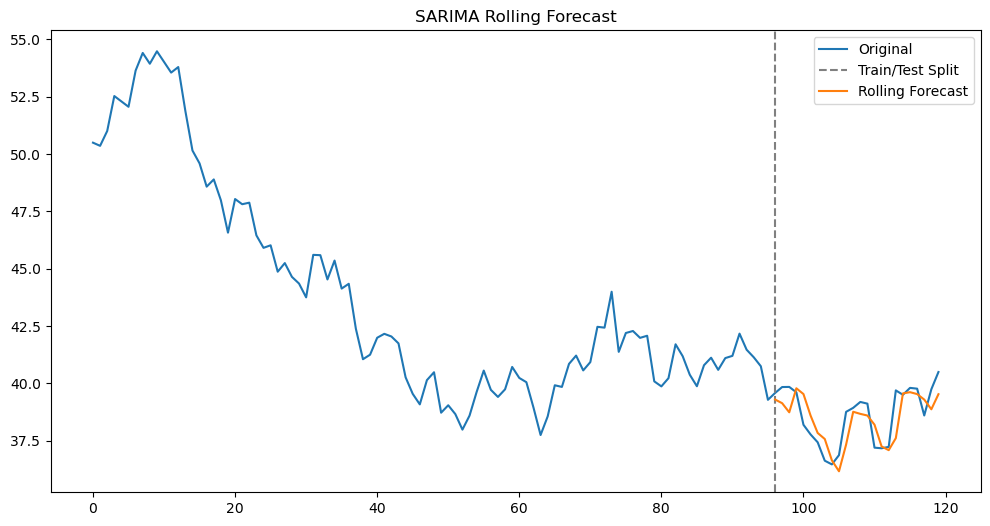

In [25]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate synthetic time series
np.random.seed(42)
n_periods = 120
time_series = np.cumsum(np.random.normal(loc=0.0, scale=1.0, size=n_periods)) + 50

# Parameters
HORIZON = 5
train_size = int(len(time_series) * 0.8)
train_ts = time_series[:train_size]
test_ts = time_series[train_size:]
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Fit model once on training data
model = SARIMAX(endog=train_ts, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Forecast total length needed
forecast = model_fit.forecast(steps=len(test_ts))

# Calculate rolling forecasts using expanding window
rolling_predictions = []
for i in range(len(test_ts)):
    end_index = train_size + i
    # Refit incrementally if needed (optional)
    temp_model = SARIMAX(endog=time_series[:end_index], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    temp_model_fit = temp_model.filter(model_fit.params)  # Use previous fit params to speed up
    yhat = temp_model_fit.forecast(steps=HORIZON)
    rolling_predictions.append(yhat[0])

# Evaluate
mse = mean_squared_error(test_ts, rolling_predictions)
print(f'Rolling Forecast MSE: {mse:.4f}')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original')
plt.axvline(x=train_size, color='gray', linestyle='--', label='Train/Test Split')
plt.plot(range(train_size, len(time_series)), rolling_predictions, label='Rolling Forecast')
plt.legend()
plt.title('SARIMA Rolling Forecast')
plt.show()